In [91]:
import pandas as pd
import numpy as np
import os 
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate


In [2]:
os.chdir('C:\\Users\\vyago\\Desktop\\Maestría Ciencias de Datos\\09-DMCYT\\02-TP2') # establezco el directorio de trabajo

In [15]:
ruta_dataset = './dataset/DataSujetos/'
ruta_mapa = './dataset/aal_extended.csv'
lista_sujetos = os.listdir(ruta_dataset) #obtengo todos los csv que hay en la carpeta del dataset
ds_mapa = pd.read_csv(ruta_mapa,sep=',',header=None)
ds_mapa.columns = ["id",'descripcion','num','zona','l-r']

In [31]:
zonas = ds_mapa['zona'].unique()

In [25]:
id_zona ={}
for zona in zonas:
    id_zona[f'{zona}'] = ds_mapa[ds_mapa['zona']==zona]['id']

In [4]:
estados = ["N1","N2","N3","W"]  # estados del sueño para tener como referencia

In [5]:
## GENERO ARRAY SHAPE (116,116,N_SUJETOS) SEGÚN ESTADO DEL SUEÑO
ds_n1 = np.empty((116,116,1))
ds_n2= np.empty((116,116,1))
ds_n3= np.empty((116,116,1))
ds_w= np.empty((116,116,1))
for sujeto in lista_sujetos:
    if sujeto.startswith("N1"):
        ds = np.genfromtxt(os.path.join(ruta_dataset,sujeto),delimiter=",")
        ds = ds[:,:,np.newaxis]
        ds_n1 = np.append(ds_n1,ds,axis=2)
    elif sujeto.startswith("N2"):
        ds = np.genfromtxt(os.path.join(ruta_dataset,sujeto),delimiter=",")
        ds = ds[:,:,np.newaxis]
        ds_n2 = np.append(ds_n2,ds,axis=2)
    elif sujeto.startswith("N3"):
        ds = np.genfromtxt(os.path.join(ruta_dataset,sujeto),delimiter=",")
        ds = ds[:,:,np.newaxis]
        ds_n3 = np.append(ds_n3,ds,axis=2)
    elif sujeto.startswith("W"):
        ds = np.genfromtxt(os.path.join(ruta_dataset,sujeto),delimiter=",")
        ds = ds[:,:,np.newaxis]
        ds_w = np.append(ds_w,ds,axis=2)
        
            

In [6]:
#PROMEDIO DE LAS CORRELACIONES DE TODOS LOS SUJETOS SEGÚN ESTADO DEL SUEÑO

dsn1_mean = np.mean(ds_n1,axis=2)
dsn2_mean = np.mean(ds_n2,axis=2)
dsn3_mean = np.mean(ds_n3,axis=2)
dsw_mean = np.mean(ds_w,axis=2)

In [7]:
#Función para generar los grafos
def graf_pesado (ds_mean):
    "Grafica un grafo pesado"

    G = nx.Graph()

    for i in range(0,115):
        for p in range(0,115):
            if p!=i:
                peso = ds_mean[i,p]
                G.add_edge(f'{i+1}',f'{p+1}', weight=peso)

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=200)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=0.09,alpha=0.7)


    # node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    # edge weight labels


    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

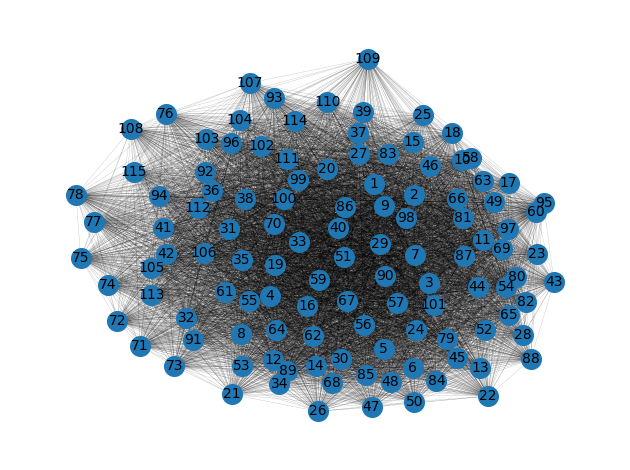

In [32]:
graf_pesado(dsn1_mean)

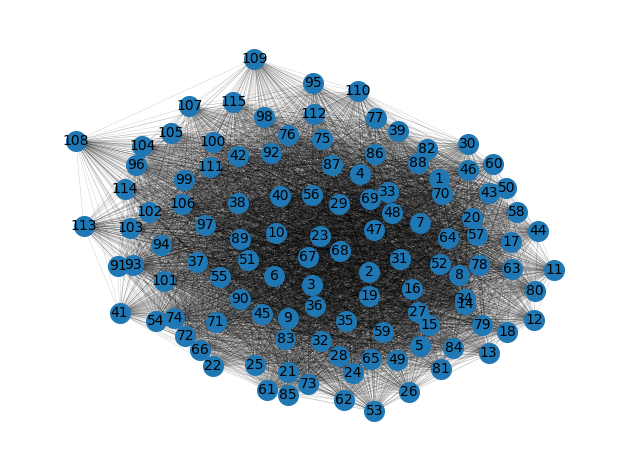

In [8]:
graf_pesado(dsn2_mean)

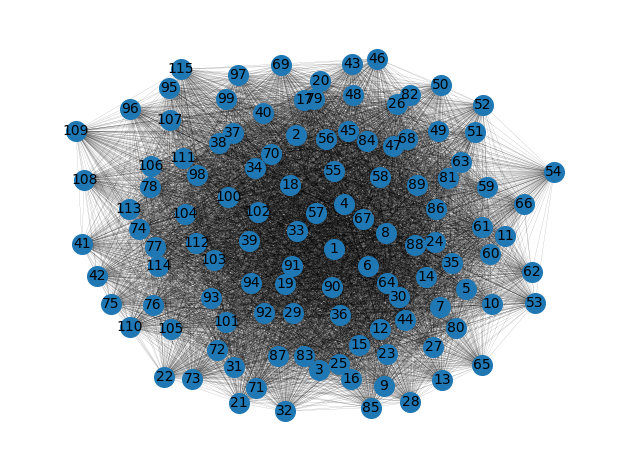

In [33]:
graf_pesado(dsn3_mean)

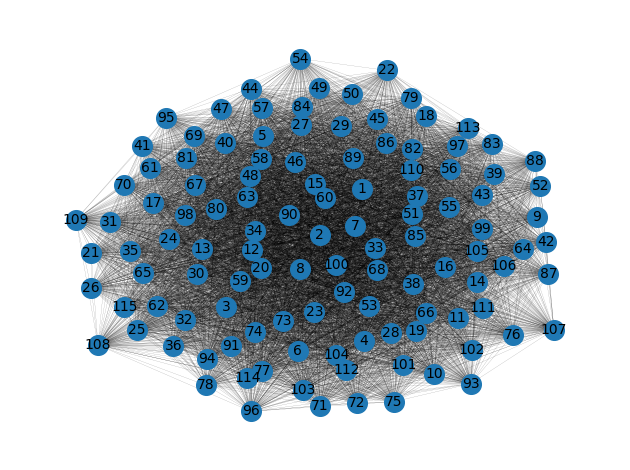

In [34]:
graf_pesado(dsw_mean)

### Cálculo de la densidad de aristas

densidad=[sum(pesos)]/n(n-1)

In [43]:
def calc_densidad(matriz):
    "Calcula la densidad para un grafo ponderado"
    n = matriz.shape[0]
    sum = np.sum(matriz)
    return (sum/(n*(n-1)))

In [57]:
dens_n1 = calc_densidad(dsn1_mean)
dens_n2 = calc_densidad(dsn2_mean)
dens_n3 = calc_densidad(dsn3_mean)
dens_w = calc_densidad(dsw_mean)

data = [{'N1',f'{dens_n1}'},
        {"N2",f'{dens_n2}'},
        {"N3",f'{dens_n3}'},
        {"W",f'{dens_w}'}]
header = ["Estado","Densidad_de_aristas"]
print(tabulate(data,headers=header,tablefmt="grid"))

+---------------------+-----------------------+
| Estado              | Densidad_de_aristas   |
+=====================+=======================+
| 0.4937466230563481  | N1                    |
+---------------------+-----------------------+
| N2                  | 0.420675155464684     |
+---------------------+-----------------------+
| 0.36226145061473053 | N3                    |
+---------------------+-----------------------+
| W                   | 0.47115415298854263   |
+---------------------+-----------------------+


### TRANSFORMACIÓN MANTENIENDO DENSIDAD CONSTANTE

In [88]:
def densidad (matriz):
    "Calcula la densidad para un grafo sin ponderar"
    m = np.sum(matriz)  #cantidad de aristas
    n = matriz.shape[0]
    return ( m/(n*(n-1)/2))
    

def punto_de_corte(matriz,densidad):
    dif_min = 1
    punto_de_corte=None
    
    correlacion=np.copy(matriz)
    for corte in np.arange(start=0.01,stop=0.6,step=0.005):
        correlacion = np.where(correlacion>=corte,1,0)
        corr_dens = densidad(correlacion)
        dif = np.absolute(corr_dens-densidad)
        if dif < dif_min:
            dif_min=dif
            punto_de_corte = corte
            densidad=corr_dens
    
    return punto_de_corte,dif_min,densidad
        

In [89]:
punto_de_corte,dif,densidad = punto_de_corte(dsn1_mean,dens_n1)

TypeError: 'numpy.float64' object is not callable